In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import random

[*********************100%%**********************]  1 of 1 completed


<AxesSubplot: >

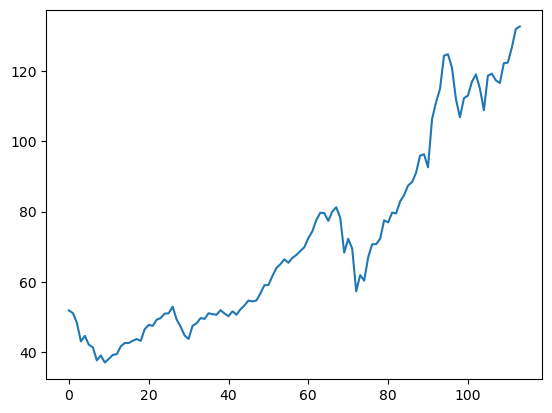

In [36]:
ticker_symbol = "AAPL"  # Google ticker symbol
start_date = "2018-11-01"
end_date = "2020-12-31"

# Fetch historical stock data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1wk")
stock = list(stock_data['Close'])
sns.lineplot(data=stock)

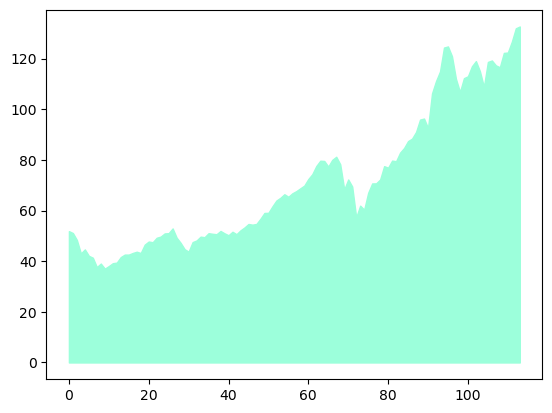

In [50]:
import matplotlib.pyplot as plt
plt.fill_between(range(len(stock)), stock, color= ('#9CFFDB'), linestyle='solid')

In [10]:
# Load historical stock price data
import yfinance as yf
ticker_symbol = "GOOGL"  # Google ticker symbol
start_date = "2010-11-01"
end_date = "2020-12-31"

# Fetch historical stock data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1mo")
stock = list(stock_data['Close'])
df = pd.DataFrame(columns=range(0,31))
for i in range(len(stock) - 30):
    row_data = stock[i:i+31]  # Extract i to i+5 elements
    df.loc[i] = row_data
df.shape

[*********************100%%**********************]  1 of 1 completed


(92, 31)

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,13.906657,14.864114,15.024024,15.350350,14.683684,13.616116,13.238739,12.672172,15.107357,13.537538,...,17.144394,18.881380,17.024525,17.476727,17.702202,18.911161,20.050051,19.874624,20.634886,21.802301
1,14.864114,15.024024,15.350350,14.683684,13.616116,13.238739,12.672172,15.107357,13.537538,12.888889,...,18.881380,17.024525,17.476727,17.702202,18.911161,20.050051,19.874624,20.634886,21.802301,22.031281
2,15.024024,15.350350,14.683684,13.616116,13.238739,12.672172,15.107357,13.537538,12.888889,14.830831,...,17.024525,17.476727,17.702202,18.911161,20.050051,19.874624,20.634886,21.802301,22.031281,22.215965
3,15.350350,14.683684,13.616116,13.238739,12.672172,15.107357,13.537538,12.888889,14.830831,14.999750,...,17.476727,17.702202,18.911161,20.050051,19.874624,20.634886,21.802301,22.031281,22.215965,21.193693
4,14.683684,13.616116,13.238739,12.672172,15.107357,13.537538,12.888889,14.830831,14.999750,16.163664,...,17.702202,18.911161,20.050051,19.874624,20.634886,21.802301,22.031281,22.215965,21.193693,21.919670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,55.195999,51.856998,50.929001,55.000000,56.459499,61.361000,61.590000,60.354000,54.528999,55.482498,...,65.204498,66.969498,71.639000,66.962502,58.097500,67.334999,71.676003,70.902496,74.397499,81.476501
88,51.856998,50.929001,55.000000,56.459499,61.361000,61.590000,60.354000,54.528999,55.482498,52.248001,...,66.969498,71.639000,66.962502,58.097500,67.334999,71.676003,70.902496,74.397499,81.476501,73.279999
89,50.929001,55.000000,56.459499,61.361000,61.590000,60.354000,54.528999,55.482498,52.248001,56.294498,...,71.639000,66.962502,58.097500,67.334999,71.676003,70.902496,74.397499,81.476501,73.279999,80.805496
90,55.000000,56.459499,61.361000,61.590000,60.354000,54.528999,55.482498,52.248001,56.294498,56.327499,...,66.962502,58.097500,67.334999,71.676003,70.902496,74.397499,81.476501,73.279999,80.805496,87.720001


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X_train_1,X_test_1, Y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [13]:
def models(X_train_1,X_test_1):
    error = {}
    small = 999999
    for i in range(1,4):
        X_train = X_train_1.iloc[:,26-i*3:-3]
        X_test = X_test_1.iloc[:,26-i*3:-3]

        scale = StandardScaler()
        X_train = scale.fit_transform(X_train)
        X_test = scale.transform(X_test)

        for j in range(8,12):
            # Define the model
            model = Sequential()
            model.add(LSTM(units=10*j, return_sequences=True, input_shape=(X_train.shape[1], 1)))
            model.add(LSTM(units=10*j))
            model.add(Dense(1))

            for k in range(6,10):

                # Compile the model
                model.compile(optimizer='adam', loss='mean_squared_error')
                model.fit(X_train, Y_train, epochs=k*10, batch_size=64)
                # Make predictions on the test set
                y_pred = model.predict(X_test)

                # Evaluate the model
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)
                s = str(26-i*3)+', '+str(10*j)+', '+str(k*10)
                error[s]=rmse
                
                if rmse<small:
                    small = rmse
                    ss = s
                    m = model
                    e = rmse
                    sc = scale
                    
        return m,e,sc,ss

In [14]:
model2, error2, scale2, which = models(X_train_1, X_test_1)

Epoch 1/60
2/2 [==============================] - 10s 8ms/step - loss: 2481.4517
Epoch 2/60
2/2 [==============================] - 0s 8ms/step - loss: 2477.1934
Epoch 3/60
2/2 [==============================] - 0s 11ms/step - loss: 2472.9443
Epoch 4/60
2/2 [==============================] - 0s 8ms/step - loss: 2467.9939
Epoch 5/60
2/2 [==============================] - 0s 8ms/step - loss: 2461.7793
Epoch 6/60
2/2 [==============================] - 0s 8ms/step - loss: 2453.9106
Epoch 7/60
2/2 [==============================] - 0s 8ms/step - loss: 2444.0388
Epoch 8/60
2/2 [==============================] - 0s 8ms/step - loss: 2430.4050
Epoch 9/60
2/2 [==============================] - 0s 16ms/step - loss: 2414.4268
Epoch 10/60
2/2 [==============================] - 0s 16ms/step - loss: 2392.7925
Epoch 11/60
2/2 [==============================] - 0s 12ms/step - loss: 2363.7595
Epoch 12/60
2/2 [==============================] - 0s 16ms/step - loss: 2329.8955
Epoch 13/60
2/2 [==============

Epoch 72/80
2/2 [==============================] - 0s 10ms/step - loss: 243.0176
Epoch 73/80
2/2 [==============================] - 0s 16ms/step - loss: 240.5892
Epoch 74/80
2/2 [==============================] - 0s 8ms/step - loss: 238.3484
Epoch 75/80
2/2 [==============================] - 0s 16ms/step - loss: 236.0343
Epoch 76/80
2/2 [==============================] - 0s 9ms/step - loss: 233.9894
Epoch 77/80
2/2 [==============================] - 0s 17ms/step - loss: 231.7942
Epoch 78/80
2/2 [==============================] - 0s 10ms/step - loss: 229.4835
Epoch 79/80
2/2 [==============================] - 0s 13ms/step - loss: 227.2120
Epoch 80/80
1/1 [==============================] - 3s 3s/step
Epoch 1/90
2/2 [==============================] - 10s 15ms/step - loss: 222.7931
Epoch 2/90
2/2 [==============================] - 0s 20ms/step - loss: 219.5441
Epoch 3/90
2/2 [==============================] - 0s 17ms/step - loss: 216.7147
Epoch 4/90
2/2 [==============================] - 0

Epoch 34/70
2/2 [==============================] - 0s 14ms/step - loss: 600.3138
Epoch 35/70
2/2 [==============================] - 0s 10ms/step - loss: 594.3735
Epoch 36/70
2/2 [==============================] - 0s 15ms/step - loss: 588.5132
Epoch 37/70
2/2 [==============================] - 0s 14ms/step - loss: 582.6943
Epoch 38/70
2/2 [==============================] - 0s 10ms/step - loss: 577.0073
Epoch 39/70
2/2 [==============================] - 0s 12ms/step - loss: 571.5850
Epoch 40/70
2/2 [==============================] - 0s 7ms/step - loss: 566.3102
Epoch 41/70
2/2 [==============================] - 0s 13ms/step - loss: 560.9888
Epoch 42/70
2/2 [==============================] - 0s 18ms/step - loss: 555.5838
Epoch 43/70
2/2 [==============================] - 0s 17ms/step - loss: 550.1424
Epoch 44/70
2/2 [==============================] - 0s 14ms/step - loss: 543.9227
Epoch 45/70
2/2 [==============================] - 0s 8ms/step - loss: 538.0348
Epoch 46/70
2/2 [=============

2/2 [==============================] - 0s 9ms/step - loss: 62.4598
Epoch 78/90
2/2 [==============================] - 0s 14ms/step - loss: 62.0752
Epoch 79/90
2/2 [==============================] - 0s 16ms/step - loss: 61.6365
Epoch 80/90
2/2 [==============================] - 0s 6ms/step - loss: 61.1753
Epoch 81/90
2/2 [==============================] - 0s 6ms/step - loss: 60.6354
Epoch 82/90
2/2 [==============================] - 0s 8ms/step - loss: 59.8867
Epoch 83/90
2/2 [==============================] - 0s 8ms/step - loss: 59.3124
Epoch 84/90
2/2 [==============================] - 0s 11ms/step - loss: 59.0118
Epoch 85/90
2/2 [==============================] - 0s 16ms/step - loss: 58.6645
Epoch 86/90
2/2 [==============================] - 0s 8ms/step - loss: 58.3880
Epoch 87/90
2/2 [==============================] - 0s 20ms/step - loss: 57.7568
Epoch 88/90
2/2 [==============================] - 0s 15ms/step - loss: 56.9183
Epoch 89/90
2/2 [==============================] - 0s 13ms

2/2 [==============================] - 0s 16ms/step - loss: 140.9529
Epoch 59/80
2/2 [==============================] - 0s 17ms/step - loss: 139.1439
Epoch 60/80
2/2 [==============================] - 0s 18ms/step - loss: 137.2775
Epoch 61/80
2/2 [==============================] - 0s 15ms/step - loss: 135.5227
Epoch 62/80
2/2 [==============================] - 0s 14ms/step - loss: 133.4955
Epoch 63/80
2/2 [==============================] - 0s 12ms/step - loss: 131.9815
Epoch 64/80
2/2 [==============================] - 0s 11ms/step - loss: 130.0049
Epoch 65/80
2/2 [==============================] - 0s 10ms/step - loss: 127.6786
Epoch 66/80
2/2 [==============================] - 0s 8ms/step - loss: 125.9320
Epoch 67/80
2/2 [==============================] - 0s 15ms/step - loss: 124.3602
Epoch 68/80
2/2 [==============================] - 0s 14ms/step - loss: 123.1874
Epoch 69/80
2/2 [==============================] - 0s 10ms/step - loss: 121.8363
Epoch 70/80
2/2 [========================

2/2 [==============================] - 0s 16ms/step - loss: 440.3280
Epoch 30/70
2/2 [==============================] - 0s 16ms/step - loss: 434.7827
Epoch 31/70
2/2 [==============================] - 0s 17ms/step - loss: 429.2175
Epoch 32/70
2/2 [==============================] - 0s 15ms/step - loss: 423.5476
Epoch 33/70
2/2 [==============================] - 0s 12ms/step - loss: 418.0648
Epoch 34/70
2/2 [==============================] - 0s 10ms/step - loss: 412.6314
Epoch 35/70
2/2 [==============================] - 0s 16ms/step - loss: 407.3499
Epoch 36/70
2/2 [==============================] - 0s 17ms/step - loss: 402.4947
Epoch 37/70
2/2 [==============================] - 0s 11ms/step - loss: 397.7526
Epoch 38/70
2/2 [==============================] - 0s 14ms/step - loss: 392.8678
Epoch 39/70
2/2 [==============================] - 0s 10ms/step - loss: 388.3200
Epoch 40/70
2/2 [==============================] - 0s 14ms/step - loss: 383.3648
Epoch 41/70
2/2 [=======================

Epoch 60/80
2/2 [==============================] - 0s 15ms/step - loss: 100.1920
Epoch 61/80
2/2 [==============================] - 0s 13ms/step - loss: 98.7744
Epoch 62/80
2/2 [==============================] - 0s 8ms/step - loss: 97.3788
Epoch 63/80
2/2 [==============================] - 0s 16ms/step - loss: 96.3036
Epoch 64/80
2/2 [==============================] - 0s 33ms/step - loss: 95.4164
Epoch 65/80
2/2 [==============================] - 0s 10ms/step - loss: 94.0393
Epoch 66/80
2/2 [==============================] - 0s 8ms/step - loss: 92.6610
Epoch 67/80
2/2 [==============================] - 0s 7ms/step - loss: 91.5307
Epoch 68/80
2/2 [==============================] - 0s 7ms/step - loss: 90.6422
Epoch 69/80
2/2 [==============================] - 0s 12ms/step - loss: 89.5710
Epoch 70/80
2/2 [==============================] - 0s 16ms/step - loss: 88.3477
Epoch 71/80
2/2 [==============================] - 0s 11ms/step - loss: 87.0216
Epoch 72/80
2/2 [==========================

2/2 [==============================] - 0s 3ms/step - loss: 32.6833
Epoch 83/90
2/2 [==============================] - 0s 5ms/step - loss: 33.0243
Epoch 84/90
2/2 [==============================] - 0s 6ms/step - loss: 32.4833
Epoch 85/90
2/2 [==============================] - 0s 16ms/step - loss: 31.8576
Epoch 86/90
2/2 [==============================] - 0s 16ms/step - loss: 31.3839
Epoch 87/90
2/2 [==============================] - 0s 16ms/step - loss: 31.3110
Epoch 88/90
2/2 [==============================] - 0s 16ms/step - loss: 31.4780
Epoch 89/90
2/2 [==============================] - 0s 16ms/step - loss: 31.4875
Epoch 90/90
1/1 [==============================] - 2s 2s/step


In [15]:
error2

4.608008902708288

In [16]:
which

'23, 110, 90'

In [18]:
X2 = X.iloc[:,23:-3]
X2 = scale2.transform(X2)
y_pred = model2.predict(X2)

3/3 [==============================] - 0s 9ms/step


In [19]:
y_pred2=[]
for l in y_pred:
    for i in l:
        y_pred2.append(i)

<AxesSubplot: >

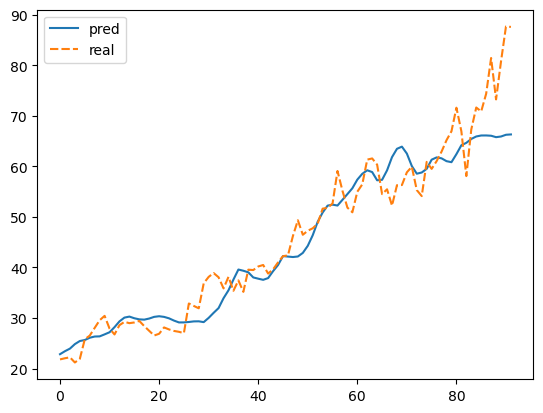

In [22]:
import seaborn as sns
df2 = pd.DataFrame({'pred': y_pred2,
                   'real': list(Y)})

sns.lineplot(data=df2[['pred','real']])

In [34]:
money = 1000
shares = 0
y = list(Y)
for i in range(len(y_pred2)-4):
    if y_pred2[i+4]>y[i]:
        shares+= (money*.05)/y[i]
        money -= money*.05
    else:
        shares-= shares/10
        money+= (shares/10)*y[i]
print(money)

1171.8737095018025


In [12]:
ticker_symbol = "MSFT"  # Google ticker symbol
start_date = "2010-11-01"
end_date = "2020-12-31"

# Fetch historical stock data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1wk")
stock = list(stock_data['Close'])
df = pd.DataFrame(columns=range(0,31))
for i in range(len(stock) - 30):
    row_data = stock[i:i+31]  # Extract i to i+5 elements
    df.loc[i] = row_data

[*********************100%%**********************]  1 of 1 completed


In [13]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

X2 = X.iloc[:,23:-4]
X2 = scale2.transform(X2)
y_pred = model2.predict(X2)

16/16 [==============================] - 0s 5ms/step


In [14]:
y_pred2=[]
for l in y_pred:
    for i in l:
        y_pred2.append(i)

<AxesSubplot: >

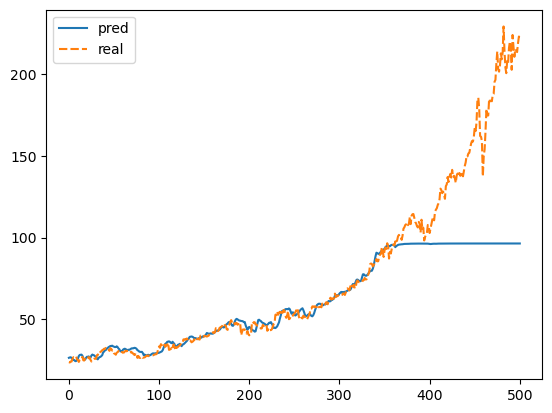

In [15]:
import seaborn as sns
df2 = pd.DataFrame({'pred': y_pred2,
                   'real': list(Y)})

sns.lineplot(data=df2[['pred','real']])